In [7]:
import pandas as pd
import matplotlib.pyplot as plt
lic = pd.read_csv("licitacao.txt", sep="|", dtype={'cd_ugestora': str,'de_ugestora': str,'nu_licitacao': str,
                                                   'tp_licitacao': float,'de_tipolicitacao': str, 'dt_homologacao': str, 
                                                   'tp_objeto': str,'de_tipoobjeto': str, 'vl_licitacao': float,'de_obs': str}, engine='python', error_bad_lines=False, encoding = 'utf8')
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})

#Analisar as licitações de João Pessoa e Campina Grande.

#Verificar quais os maiores vencedores e quais os menores vencedores.

#Analisar por município ao invés de unidade gestora. Olhar dados de “jurisdicionado.csv”.



Skipping line 135331: '|' expected after '"'
Skipping line 155831: '|' expected after '"'
Skipping line 163217: '|' expected after '"'


In [9]:
lic_mun = pd.merge(lic, jur, left_on="cd_ugestora", right_on="codigo_sagres", how="left")
lic_mun

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs,...,poder,tipojurisdicionado_fk,localidade_fk,nome,codigo_sagres,previdenciario,municipio_importacao,tramita_id,cancelled,esfera
0,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...,...,2.0,3.0,1435.0,Câmara Municipal de Capim,101052,False,Capim,71.0,False,1.0
1,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
2,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
3,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
4,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
5,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
6,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
7,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
8,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
9,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER...",...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0


Text(0.5, 0, 'Quantidade de licitações')

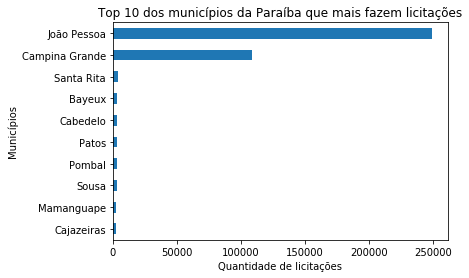

In [11]:
#Ranking dos municípios por quantidade de licitações feitas
lic_mun['municipio_importacao'].value_counts()[:10]
lic_mun['municipio_importacao'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title("Top 10 dos municípios da Paraíba que mais fazem licitações")
plt.ylabel('Municípios')
plt.xlabel('Quantidade de licitações')

In [14]:
lic_mun['municipio_importacao'].value_counts()[:10]

João Pessoa       248856
Campina Grande    108294
Santa Rita          3873
Bayeux              3065
Cabedelo            2998
Patos               2992
Pombal              2908
Sousa               2777
Mamanguape          2387
Cajazeiras          2287
Name: municipio_importacao, dtype: int64

Text(0.5, 0, 'Soma das Licitações')

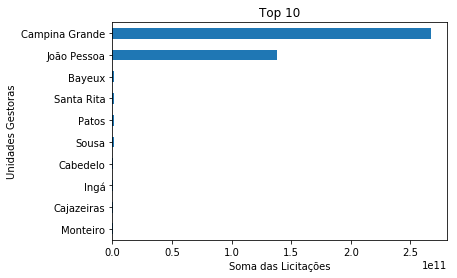

In [28]:
qtd_ugestora = lic_mun.groupby(['municipio_importacao'])['vl_Licitacao'].sum() #somando as icitações
qtd_ug = qtd_ugestora.sort_values(ascending=False)[:10]  #colocando em ordem decrescente
qtd_ug.plot(kind='barh', x='municipio_importacao', y='vl_Licitacao').invert_yaxis()
plt.title("Top 10")
plt.ylabel('Unidades Gestoras')
plt.xlabel('Soma das Licitações')

In [29]:
qtd_ug = qtd_ugestora.sort_values(ascending=False)[:10]  #colocando em ordem decrescente
qtd_ug

municipio_importacao
Campina Grande    2.674818e+11
João Pessoa       1.381680e+11
Bayeux            1.301366e+09
Santa Rita        1.148738e+09
Patos             1.031930e+09
Sousa             9.725942e+08
Cabedelo          8.160791e+08
Ingá              7.966534e+08
Cajazeiras        5.832408e+08
Monteiro          5.484546e+08
Name: vl_Licitacao, dtype: float64

In [26]:
ww = lic_mun.groupby(['municipio_importacao'])['vl_Licitacao'].sum() #somando as icitações
ww

municipio_importacao
Aguiar                            6.864440e+07
Alagoa Grande                     1.525871e+08
Alagoa Nova                       1.329511e+08
Alagoinha                         8.244880e+07
Alcantil                          5.610635e+07
Algodão de Jandaíra               5.624848e+07
Alhandra                          2.051465e+08
Amparo                            5.291989e+07
Aparecida                         7.289908e+07
Arara                             7.476337e+07
Araruna                           1.108108e+08
Araçagi                           1.235912e+08
Areia                             1.344068e+08
Areia de Baraúnas                 5.003063e+07
Areial                            4.972473e+07
Aroeiras                          1.404996e+08
Assunção                          5.331909e+07
Bananeiras                        1.536319e+08
Baraúna                           5.437935e+07
Barra de Santa Rosa               7.748694e+07
Barra de Santana                  7.542

In [8]:
mun = lic['de_ugestora'].groupby(local['nome'])
mun

In [11]:
licug = lic['de_ugestora'].value_counts()
licug

Fundação Cultural de João Pessoa                                                                  6926
Prefeitura Municipal de João Pessoa                                                               5947
Prefeitura Municipal de Campina Grande                                                            4679
Fundo Municipal de Saúde de Campina Grande                                                        3947
Prefeitura Municipal de Santa Rita                                                                3022
Prefeitura Municipal de Patos                                                                     2701
Prefeitura Municipal de Cabedelo                                                                  2301
Prefeitura Municipal de Sousa                                                                     2205
Fundo Municipal de Saúde de João Pessoa                                                           2139
Prefeitura Municipal de Pombal                                           

In [19]:
aa = licug.groupby(jur['municipio_importacao'])
aa

In [21]:
aa.sort_values()

AttributeError: Cannot access callable attribute 'sort_values' of 'SeriesGroupBy' objects, try using the 'apply' method

In [12]:
munic = licug.groupby(local['nome'])
munic

In [18]:
munic.count()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [28]:
municipio = jur['municipio_importacao']
lic.loc[(lic['de_ugestora'] == jur['nome']).isin(municipio)]

ValueError: Can only compare identically-labeled Series objects

In [45]:
cond = [(lic['de_ugestora'] == jur['nome'])]
import numpy as np
jur['nome'] = np.select(cond)

ValueError: Can only compare identically-labeled Series objects

In [42]:
lic[jur[['municipio_importacao']].isin(jur['nome'] == lic['de_ugestora'])]

ValueError: Can only compare identically-labeled Series objects

In [40]:
lic.loc[lic['de_ugestora'] == jur['nome']]

ValueError: Can only compare identically-labeled Series objects

In [41]:
print(jur[['municipio_importacao']].loc[jur['nome'] == lic['de_ugestora']])

ValueError: Can only compare identically-labeled Series objects

In [39]:
teste = lic[(~lic[['de_ugestora']].isin(jur[['nome','municipio_importacao']])).any(axis=1)]
teste

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs
0,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...
1,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS
2,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO
3,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE
4,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.
5,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...
6,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...
7,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...
8,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...
9,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER..."


In [30]:
lic.loc[(lic['de_ugestora'] == jur['nome']) & jur['nome'] == jur['municipio_importacao']]

ValueError: Can only compare identically-labeled Series objects

In [25]:
lic.loc[lic['de_ugestora'] == jur['nome']]

ValueError: Can only compare identically-labeled Series objects

In [47]:
lic['de_ugestora'].equals(jur['nome']) 

False

In [8]:
jur.dtypes

id                         int64
pessoajuridica             int64
poder                      int64
tipojurisdicionado_fk      int64
localidade_fk            float64
nome                      object
codigo_sagres             object
previdenciario              bool
municipio_importacao      object
tramita_id                 int64
cancelled                   bool
esfera                   float64
dtype: object

In [5]:
lic

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs
0,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...
1,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS
2,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO
3,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE
4,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.
5,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...
6,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...
7,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...
8,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...
9,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER..."
